# Recommendation Engine

### Problem Statement :- 

    - Build a recommender system with the given data using UBCF.

### Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
ratings = pd.read_csv("Archive-4/anime.csv")
ratings.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
ratings.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
ratings["genre"] = ratings["genre"].fillna(" ")

In [6]:
ratings["type"] = ratings["type"].fillna(" ")

In [7]:
ratings.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


### Visualization

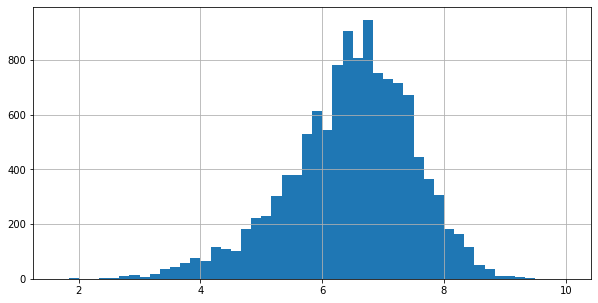

In [8]:
# Distribution of Ratings
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
ratings['rating'].hist(bins=50)
plt.show()

### Fitting and Transforming

In [9]:
# Preparing the Tfidf matrix by fitting and transforming


from sklearn.feature_extraction.text import TfidfVectorizer #term frequencey- inverse document frequncy is a numerical statistic that is intended to reflect how important a word is to document in a collecion or corpus

# Creating a Tfidf Vectorizer to remove all stop words
tfidf = TfidfVectorizer(stop_words="english")    #taking stop words from tfid vectorizer 


tfidf_matrix = tfidf.fit_transform(ratings.genre)   #Transform a count matrix to a normalized tf or tf-idf representation
tfidf_matrix.shape #12294,46

(12294, 46)

### Finding similarity score with Cosine similarity

In [10]:
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity on Tfidf matrix
cosine_sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix)

# creating a mapping of anime name to index number 
anime_index = pd.Series(ratings.index,index=ratings['name']).drop_duplicates()

In [11]:
anime_index["Gintama"]

12

In [12]:
def get_anime_recommendations(Name,topN):
    
   
    #topN = 10
    # Getting the movie index using its title 
    anime_id = anime_index[Name]
    
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_matrix[anime_id]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores,key=lambda x:x[1],reverse = True)
    
    # Get the scores of top 10 most similar anime's 
    cosine_scores_10 = cosine_scores[0:topN+1]
    
    # Getting the anime index 
    anime_idx  =  [i[0] for i in cosine_scores_10]
    anime_scores =  [i[1] for i in cosine_scores_10]
    
    # Similar movies and scores
    anime_similar_show = pd.DataFrame(columns=["name","Score"])
    anime_similar_show["name"] = ratings.loc[anime_idx,"name"]
    anime_similar_show["Score"] = anime_scores
    anime_similar_show.reset_index(inplace=True)  
    anime_similar_show.drop(["index"],axis=1,inplace=True)
    print (anime_similar_show)
    #return (anime_similar_show)

### Finding the similarity score for an entity

In [13]:
# Enter your anime and number of anime's to be recommended 
get_anime_recommendations("Kimi no Na wa.",topN=15)

                                     name     Score
0                          Kimi no Na wa.  1.000000
1             Wind: A Breath of Heart OVA  1.000000
2            Wind: A Breath of Heart (TV)  1.000000
3   Aura: Maryuuin Kouga Saigo no Tatakai  0.955317
4          Angel Beats!: Another Epilogue  0.871505
5                                Harmonie  0.871505
6           Shakugan no Shana II (Second)  0.868830
7                       Shakugan no Shana  0.868830
8                     Shakugan no Shana S  0.868830
9                               Air Movie  0.854802
10                           Touka Gettan  0.854802
11                         Mizuiro (2003)  0.854802
12                     Venus Versus Virus  0.854802
13            Rokujouma no Shinryakusha!?  0.848888
14                           Renai Boukun  0.848888
15          Kokoro ga Sakebitagatterunda.  0.838815


### Conclusion

    - Created simple anime recommendation system based on ratings and genre.
    - Found the similarity matrix for on entity from the list.